<a href="https://colab.research.google.com/github/Alexcon19/Modelo-IA-Selecci-n-Fibra/blob/main/Copia_de_86_DOE_TRES_FACTORES_Actividad_En_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diseño Factorial: Tres Factores**
## **Nuestras librerias**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
!pip install bioinfokit
from bioinfokit.analys import stat
from statsmodels.graphics.factorplots import interaction_plot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59055 sha256=a309286cb35e0d14d2abda56f5a1808a25be00cbd56fa4d6b8094b3710cfe328
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


# **1. Ejemplo de un diseño factorial Tres Factores**

- ***El experimento Se desea investigar el efecto del tipo de suspensión (A), abertura de malla (B) y temperatura de ciclaje (C) en el volumen de sedimentación Y(%) de una suspensión. Para ello se decide correr un experimento factorial 3×2×2 con seis réplicas, y las observaciones obtenidas en las 72 corridas experimentales se muestran en la siguiente tabla:***


| A1 // B | B1| B1 | B1 | B2 | B2| B2|
|:---:| :---: | :---: | :---: | :---: |:---: | :---: |
|	      | 60 | 75 |	75 |	67 | 73 | 73 |
|C1     | 86 | 70 |	70 |	67 | 68 | 68 |
||
|	      | 55 | 53 |	53 |	52 | 52 | 57 |
|C2	    | 55 | 55 |	55 |	52 | 54 | 54 |


| A2 // B | B1| B1 | B1 | B2 | B2| B2|
|:---:| :---: | :---: | :---: | :---: |:---: | :---: |
|	      | 62 | 68 |	65 |	71 | 80 | 80 |
|C1     | 76 | 65 |	65 |	72 | 80 | 80 |
||
|	      | 44 | 44 |	45 |	60 | 60 | 60 |
|C2	    | 48 | 48 |	45 |	67 | 67 | 65 |
    

| A3 // B | B1| B1 | B1 | B2 | B2| B2|
|:---:| :---: | :---: | :---: | :---: |:---: | :---: |
|	      | 70 | 71 |	75 |	75 | 75 | 75 |
|C1     | 76 | 68 |	73 |	75 | 75 | 77 |
||
|	      | 52 | 51 |	50 |	56 | 55 | 57 |
|C2	    | 52 | 48 |	54 |	59 | 50 | 55 |



# **2. Importando una base de datos a Python**

In [ ]:
import cv2 as cv
from google.colab import files
uploaded=files.upload()

Saving DOE_3_Factores_Actividad_En_Clase_.csv to DOE_3_Factores_Actividad_En_Clase_.csv


In [ ]:
datos=pd.read_csv("DOE_3_Factores_Actividad_En_Clase_.csv", delimiter=',')

In [ ]:
datos

,TCOC,PRESION,CONCENT,RESISTENCIA
0,A1,B1,C1,"196,60"
1,A1,B1,C1,"196,00"
2,A1,B2,C1,"197,70"
3,A1,B2,C1,"196,00"
4,A1,B3,C1,"199,80"
5,A1,B3,C1,"199,40"
6,A1,B1,C2,"198,50"
7,A1,B1,C2,"197,20"
8,A1,B2,C2,"196,00"
9,A1,B2,C2,"196,90"


# **3. Diagrama de caja y Bigotes**

In [ ]:
import seaborn as sns

In [ ]:
def not_convertible(val):
    try:
        float(val)
        return False
    except ValueError:
        return True

problematic_values = datos[datos['RESISTENCIA'].apply(not_convertible)]['RESISTENCIA']
print(problematic_values)

datos['RESISTENCIA'] = datos['RESISTENCIA'].str.replace('.', '').str.replace(',', '.').astype(float)
print(datos.dtypes)
datos

0     196,60
1     196,00
2     197,70
3     196,00
4     199,80
5     199,40
6     198,50
7     197,20
8     196,00
9     196,90
10    198,40
11    197,60
12    197,50
13    196,60
14    195,60
15    196,20
16    197,40
17    198,10
18    198,40
19    198,60
20    199,60
21    200,40
22    200,60
23    200,90
24    197,50
25    198,10
26    198,70
27    198,00
28    199,60
29    199,00
30    197,60
31    198,40
32    197,00
33    197,80
34    198,50
35    199,80
Name: RESISTENCIA, dtype: object
TCOC            object
PRESION         object
CONCENT         object
RESISTENCIA    float64
dtype: object


<ipython-input-19-8e257789621b>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  datos['RESISTENCIA'] = datos['RESISTENCIA'].str.replace('.', '').str.replace(',', '.').astype(float)


,TCOC,PRESION,CONCENT,RESISTENCIA
0,A1,B1,C1,196.6
1,A1,B1,C1,196.0
2,A1,B2,C1,197.7
3,A1,B2,C1,196.0
4,A1,B3,C1,199.8
5,A1,B3,C1,199.4
6,A1,B1,C2,198.5
7,A1,B1,C2,197.2
8,A1,B2,C2,196.0
9,A1,B2,C2,196.9


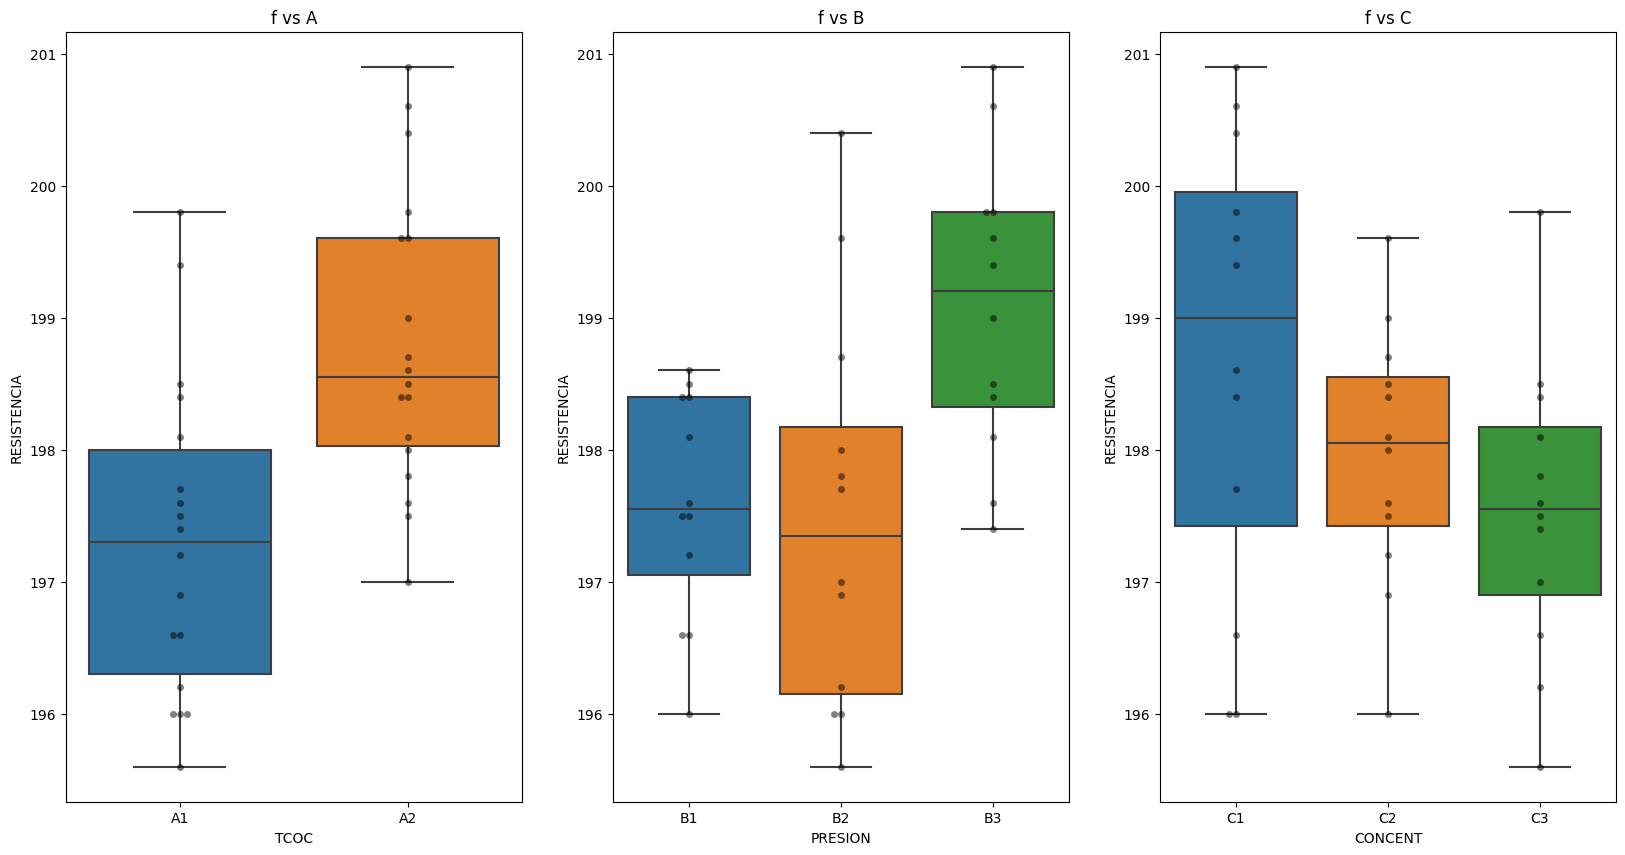

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].set_title('f vs A')
sns.boxplot(x="TCOC", y="RESISTENCIA", data=datos, ax=axs[0])
sns.swarmplot(x="TCOC", y="RESISTENCIA", data=datos, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('f vs B')
sns.boxplot(x="PRESION", y="RESISTENCIA", data=datos, ax=axs[1])
sns.swarmplot(x="PRESION", y="RESISTENCIA", data=datos, color='black',
              alpha = 0.5, ax=axs[1]);

axs[2].set_title('f vs C')
sns.boxplot(x="CONCENT", y="RESISTENCIA", data=datos, ax=axs[2])
sns.swarmplot(x="CONCENT", y="RESISTENCIA", data=datos, color='black',
              alpha = 0.5, ax=axs[2]);

# **4. Diagrama de caja y Bigotes Bidimensional**

<Axes: title={'center': 'f vs B y C'}, xlabel='PRESION', ylabel='RESISTENCIA'>

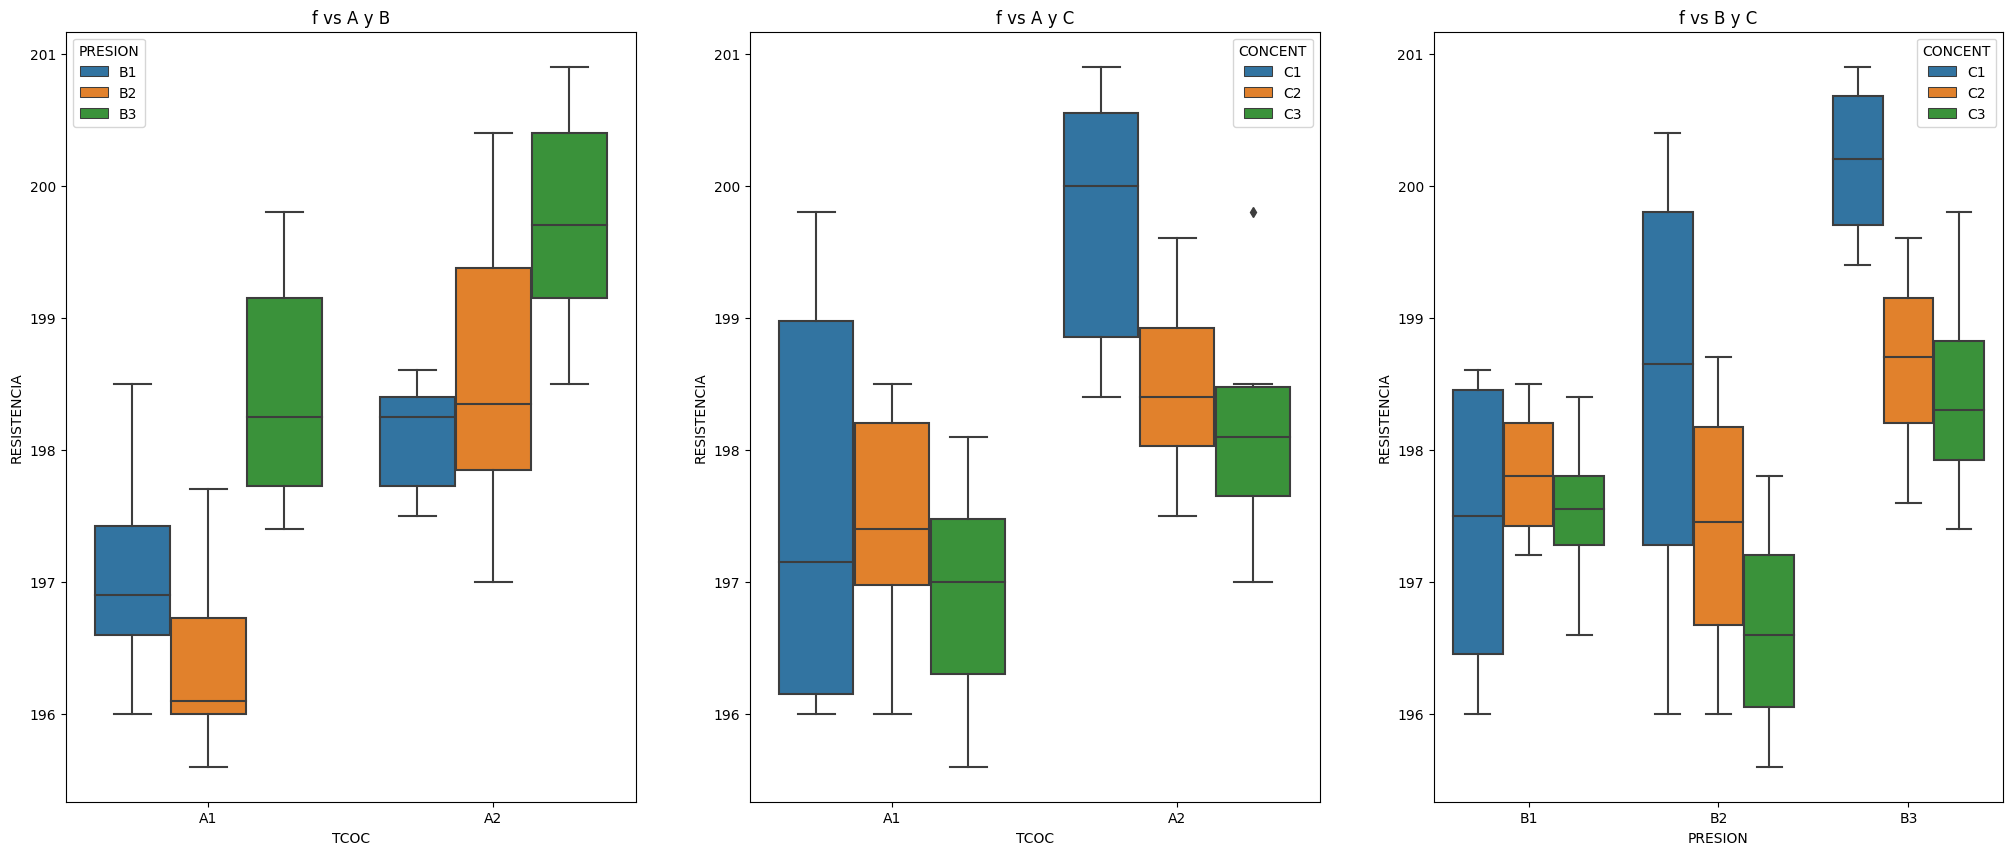

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(25, 10))
axs[0].set_title('f vs A y B')
sns.boxplot(x="TCOC", y="RESISTENCIA", hue = "PRESION", data=datos, ax=axs[0]);
axs[1].set_title('f vs A y C')
sns.boxplot(x="TCOC", y="RESISTENCIA", hue = "CONCENT", data=datos, ax=axs[1])
axs[2].set_title('f vs B y C');
sns.boxplot(x="PRESION", y="RESISTENCIA", hue = "CONCENT", data=datos, ax=axs[2])

# **5. Media y desviación estandar para cada factor de interés**

In [ ]:
print('RESISTENCIA media y desviación típica para TCOC')
datos.groupby('TCOC')['RESISTENCIA'].agg(['mean', 'std'])


RESISTENCIA media y desviación típica para TCOC


,mean,std
TCOC,,
A1,197.305556,1.202190
A2,198.805556,1.124315


In [ ]:
print('VOLUMEN media y desviación típica para ABERTURA')
datos.groupby('ABERTURA')['VOLUMEN'].agg(['mean', 'std'])


VOLUMEN media y desviación típica para ABERTURA


,mean,std
ABERTURA,,
B1,60.472222,11.450480
B2,65.638889,9.666297


# **6. Media y desviación estandard para toda la base de datos**

In [ ]:
print('VOLUMEN media y desviación típica para ABERTURA')
datos.groupby(['SUSPENSIÓN', 'ABERTURA', 'TEMPERATURA'])['VOLUMEN'].agg(['mean', 'std'])

VOLUMEN media y desviación típica para ABERTURA


mean       std
SUSPENSIÓN ABERTURA TEMPERATURA                     
A1         B1       C1           72.666667  8.524475
                    C2           54.333333  1.032796
           B2       C1           69.333333  2.875181
                    C2           53.500000  1.974842
A2         B1       C1           66.833333  4.875107
                    C2           45.666667  1.861899
           B2       C1           77.166667  4.400758
                    C2           63.166667  3.544949
A3         B1       C1           72.166667  3.060501
                    C2           51.166667  2.041241
           B2       C1           75.333333  0.816497
                    C2           55.333333  3.011091

In [ ]:
print('VOLUMEN media y desviación típica para TEMPERATURA')
datos.groupby('TEMPERATURA')['VOLUMEN'].agg(['mean', 'std'])

VOLUMEN media y desviación típica para TEMPERATURA


,mean,std
TEMPERATURA,,
C1,72.250000,5.608030
C2,53.861111,5.737858


# **7. Diagramas de interacción**

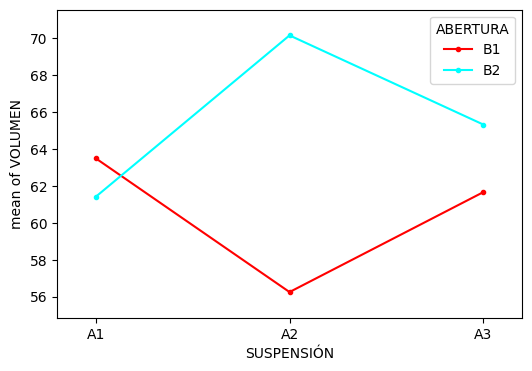

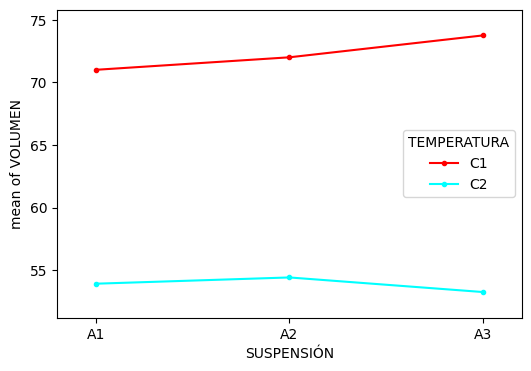

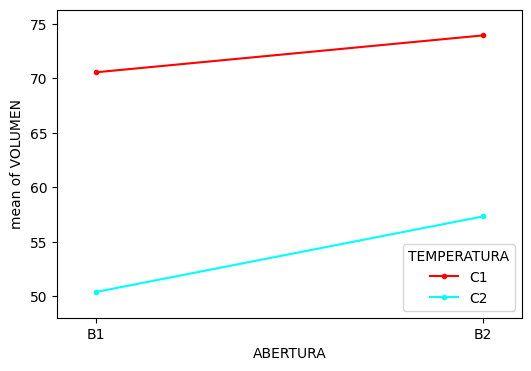

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.SUSPENSIÓN,
    trace    = datos.ABERTURA,
    response = datos.VOLUMEN,
    ax       = ax,
)
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.SUSPENSIÓN,
    trace    = datos.TEMPERATURA,
    response = datos.VOLUMEN,
    ax       = ax,
)
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.ABERTURA,
    trace    = datos.TEMPERATURA,
    response = datos.VOLUMEN,
    ax       = ax,
)

# **8. Anova para el diseño factorial**

In [ ]:
!pip install pingouin

In [ ]:
import pingouin as pg

In [ ]:
pg.anova(
    data     = datos,
    dv       = 'f',
    between  = ['A', 'B'],
    detailed = True
).round(6)

,Source,SS,DF,MS,F,p-unc,np2
0,A,13.861111,2,6.930556,0.064816,0.937300,0.001960
1,B,480.500000,1,480.500000,4.493730,0.037784,0.063747
2,A * B,788.250000,2,394.125000,3.685934,0.030372,0.100473
3,Residual,7057.166667,66,106.926768,NaN,NaN,NaN


In [ ]:
pg.anova(
    data     = datos,
    dv       = 'f',
    between  = ['A', 'C'],
    detailed = True
).round(6)

,Source,SS,DF,MS,F,p-unc,np2
0,A,13.861111,2,6.930556,0.208074,0.812677,0.006266
1,C,6086.722222,1,6086.722222,182.740106,0.000000,0.734663
2,A * C,40.861111,2,20.430556,0.613381,0.544575,0.018248
3,Residual,2198.333333,66,33.308081,NaN,NaN,NaN


In [ ]:
pg.anova(
    data     = datos,
    dv       = 'f',
    between  = ['B',  'C'],
    detailed = True
).round(6)

,Source,SS,DF,MS,F,p-unc,np2
0,B,480.500000,1,480.500000,19.044492,0.000044,0.218790
1,C,6086.722222,1,6086.722222,241.245645,0.000000,0.780110
2,B * C,56.888889,1,56.888889,2.254776,0.137832,0.032094
3,Residual,1715.666667,68,25.230392,NaN,NaN,NaN


# **9. Anova usando StatModels**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
model2 = ols('f ~ A*B*C',                 # Model formula
            data = datos).fit()

anova_result = sm.stats.anova_lm(model2, typ=2)
print (anova_result)

               sum_sq    df           F        PR(>F)
A           13.861111   2.0    0.494059  6.126048e-01
B          480.500000   1.0   34.253465  2.162425e-07
C         6086.722222   1.0  433.904950  3.745002e-29
A:B        788.250000   2.0   28.096040  2.450427e-09
A:C         40.861111   2.0    1.456436  2.411861e-01
B:C         56.888889   1.0    4.055446  4.852002e-02
A:B:C       31.027778   2.0    1.105941  3.375495e-01
Residual   841.666667  60.0         NaN           NaN


# **10. Método de comparaciones múltiples**

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

group1,group2,meandiff,p-adj,lower,upper,reject
A1,A2,0.75,0.9,-6.8456,8.3456,False
A1,A3,1.0417,0.9,-6.554,8.6373,False
A2,A3,0.2917,0.9,-7.304,7.8873,False


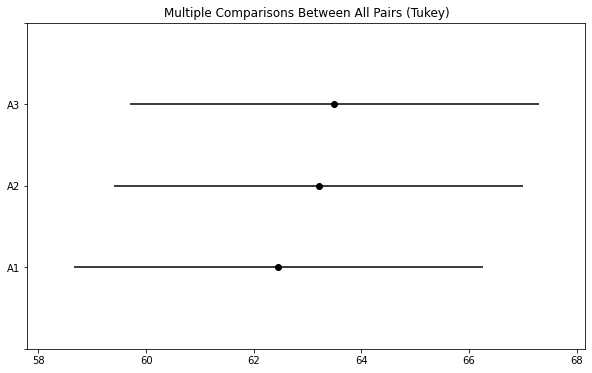

In [ ]:
tukey = pairwise_tukeyhsd(endog=datos["f"],     # Data
                          groups=datos["A"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=14.5, color="red")

tukey.summary()

In [ ]:
tukey = pairwise_tukeyhsd(endog=datos["f"],     # Data
                          groups=datos["B"],   # Groups
                          alpha=0.05)          # Significance level

#tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=49.57,ymin=-0.5,ymax=14.5, color="red")

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
B1,B2,5.1667,0.0423,0.1856,10.1478,True


In [ ]:
tukey = pairwise_tukeyhsd(endog=datos["f"],     # Data
                          groups=datos["C"],   # Groups
                          alpha=0.05)          # Significance level

#tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=49.57,ymin=-0.5,ymax=14.5, color="red")

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
C1,C2,-18.3889,0.001,-21.0559,-15.7219,True
